# EDA and Cleaning of Diabetics Data

- First Step to load data frame
- Second Step to create Dictionary to converge into one dataset. This will make reading the inital dataset a little easier. 

In [1]:
# Libraries to load
import pandas as pd
import numpy as np 
from scipy import stats
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


# data visualization packages 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import seaborn as sns
pd.set_option('max_columns', None)
import pandas_profiling

# SMOTE package to address imbalanced classes 
from imblearn.over_sampling import SMOTE 

from warnings import filterwarnings
filterwarnings('ignore')
np.random.seed(123)

In [2]:
# Load DF
df = pd.read_csv('./data/diabetic_data.csv', na_values='?')

In [3]:
# Shape of dataframe
df.shape

(101766, 50)

In [4]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [5]:
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

# Cleaning - Missingness

<AxesSubplot:>

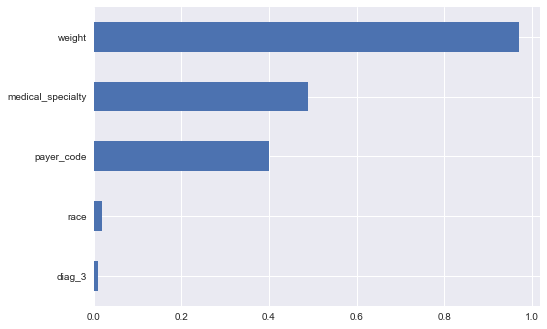

In [6]:
# Compute missingness 
missing = round((df.isna().sum()/len(df)),2).sort_values(ascending = True)
missing = missing[missing > 0]
missing.plot(kind='barh')

In [33]:
# Missing values table 
missing_table = pd.DataFrame(data=missing)
missing_table = missing_table.reset_index()
missing_table.columns = ['Feature', 'Percentage']
missing_table.style.hide_index()

Feature,Percentage
diag_3,0.010000
race,0.020000
payer_code,0.400000
medical_specialty,0.490000
weight,0.970000


Text(0, 0.5, 'Feature')

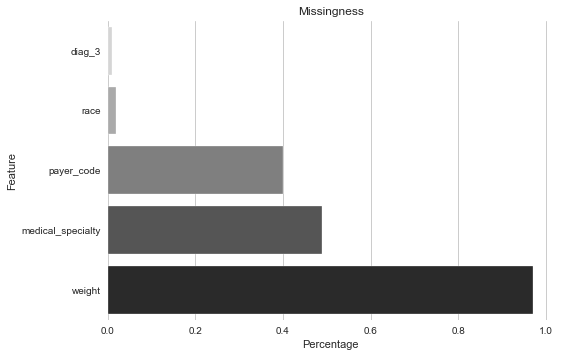

In [34]:
plt.figure()
sns.barplot(x="Percentage", y="Feature", data=missing_table , ci=95, palette = 'binary')
sns.set_style(style="whitegrid")
plt.title('Missingness')
plt.xlabel('Percentage')
plt.ylabel('Feature')

In [8]:
# Create target column
#Set all values <30 to YES (Readmission), else all other values to NO
df.readmitted = df.readmitted.apply(lambda x: 'Yes' if x in ['<30'] else 'No')

In [9]:
# Drop columns for missingness
df = df.drop(columns="weight")
df = df.drop(columns="payer_code")
df = df.drop(columns="medical_specialty")

In [10]:
# Dealing with Missingness
df = df.replace("?",np.NaN)
df.race = df.race.replace(np.NaN,"unknown")
df = df.replace(np.NaN, "missing")

In [11]:
df.isna().sum().sum()

0

In [12]:
# # Ensuring correct type of variables
# df.admission_type_id = df.admission_type_id.apply(str)
# df.discharge_disposition_id = df.discharge_disposition_id.apply(str)
# df.admission_source_id = df.admission_source_id.apply(str)

# Cleaning - Delete Multiple Encounters

In [13]:
# Drop duplicate values for patient number. Keep first entry to show if patient was readmitted or not. 
df = df.drop_duplicates('patient_nbr', keep = 'first')
df = df.drop(columns="encounter_id")
df = df.drop(columns="patient_nbr")

## Write CSV's 

In [14]:
#Main DF
df.to_csv(r'./data/cleaned_df.csv', index = False)